In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook vengono analizzate le simulazioni caratterizzate da parametro:
$$\alpha\,=\,1\cdot 10^{-2}$$

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;">Eccentricità: e = 0 </span>

<center>

### Output finali

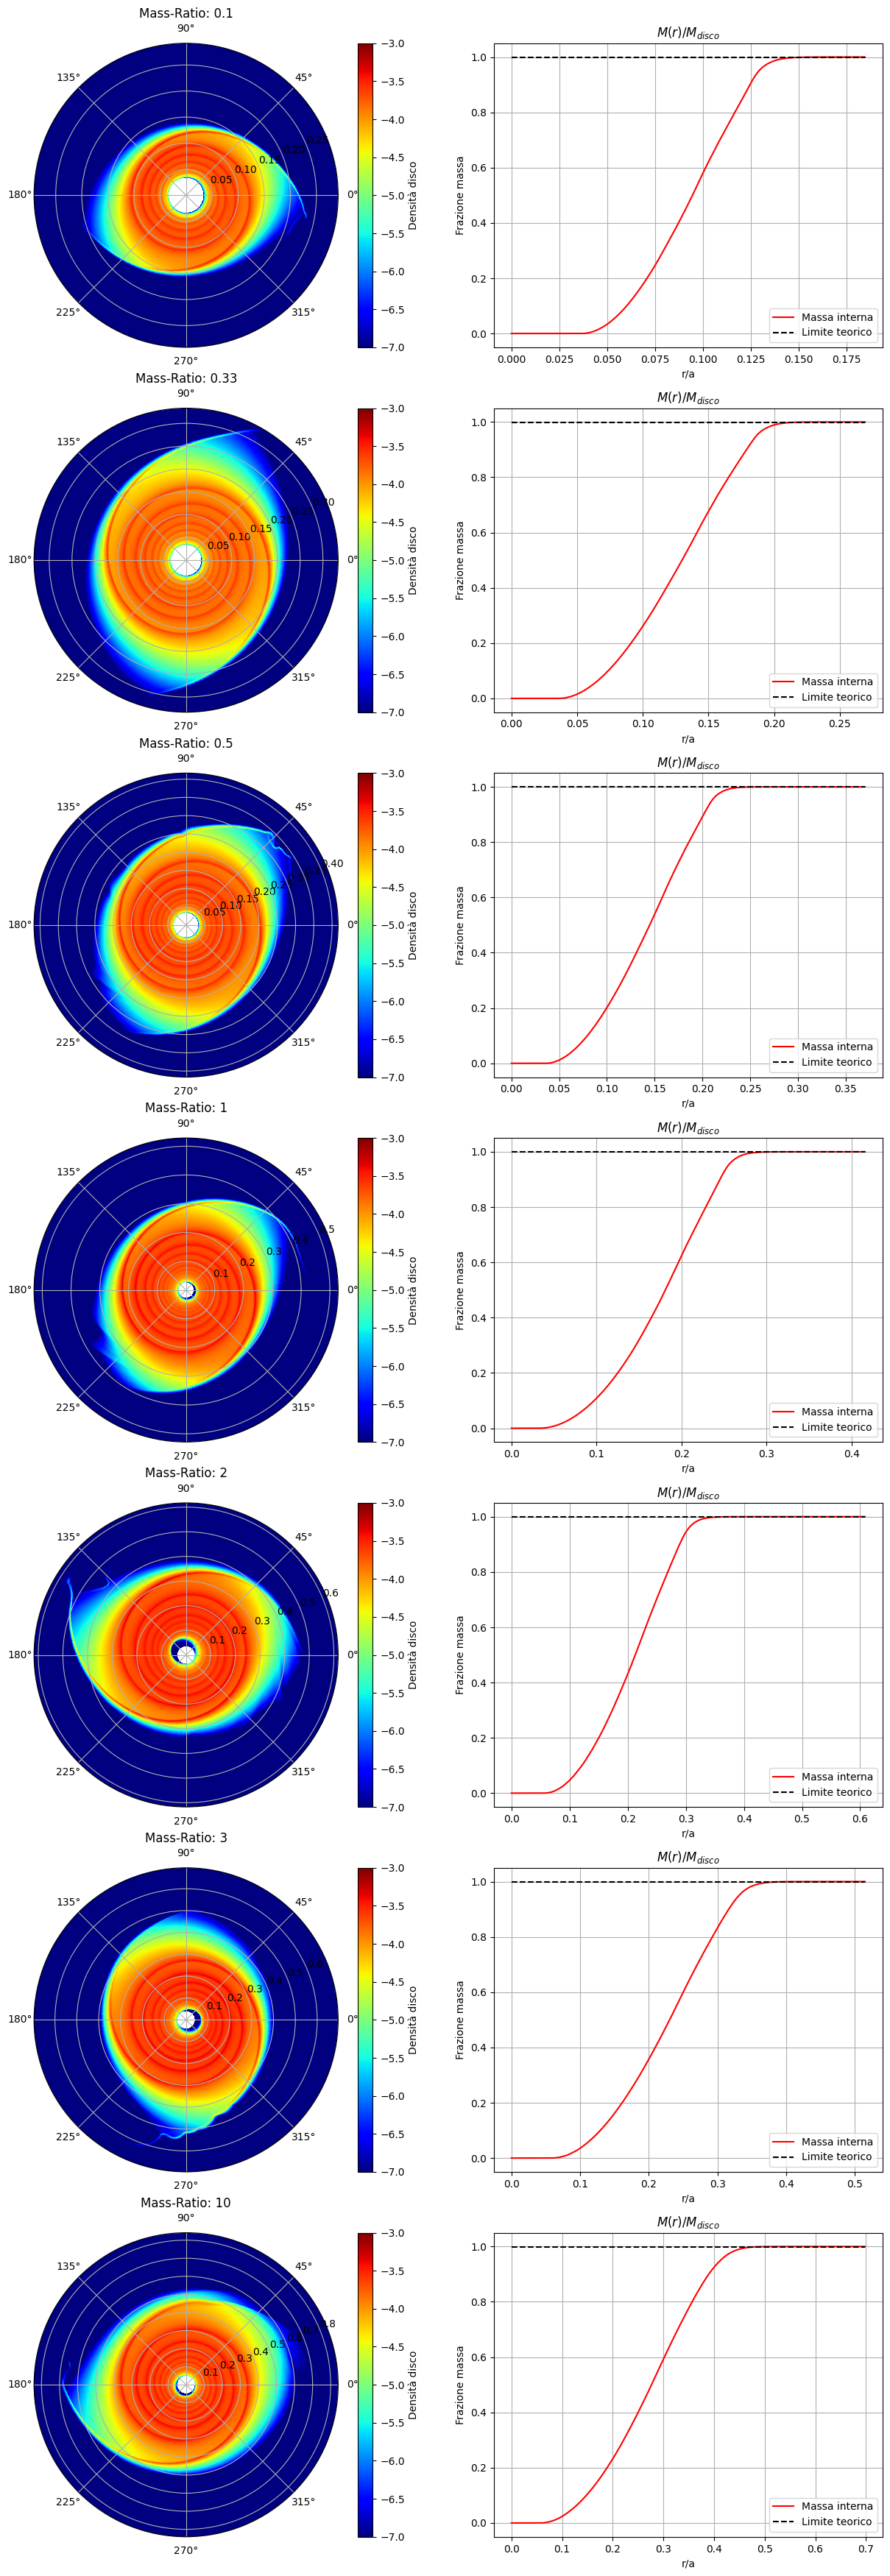

In [3]:
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [4]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-2/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e0[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e0[h], 3)) + " a")


Il raggio di troncamento con mass-ratio 0.1 è: 0.15 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.218 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.245 a
Il raggio di troncamento con mass-ratio 1 è: 0.298 a
Il raggio di troncamento con mass-ratio 2 è: 0.354 a
Il raggio di troncamento con mass-ratio 3 è: 0.387 a
Il raggio di troncamento con mass-ratio 10 è: 0.481 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.3 </span>

<center>

### Output finali

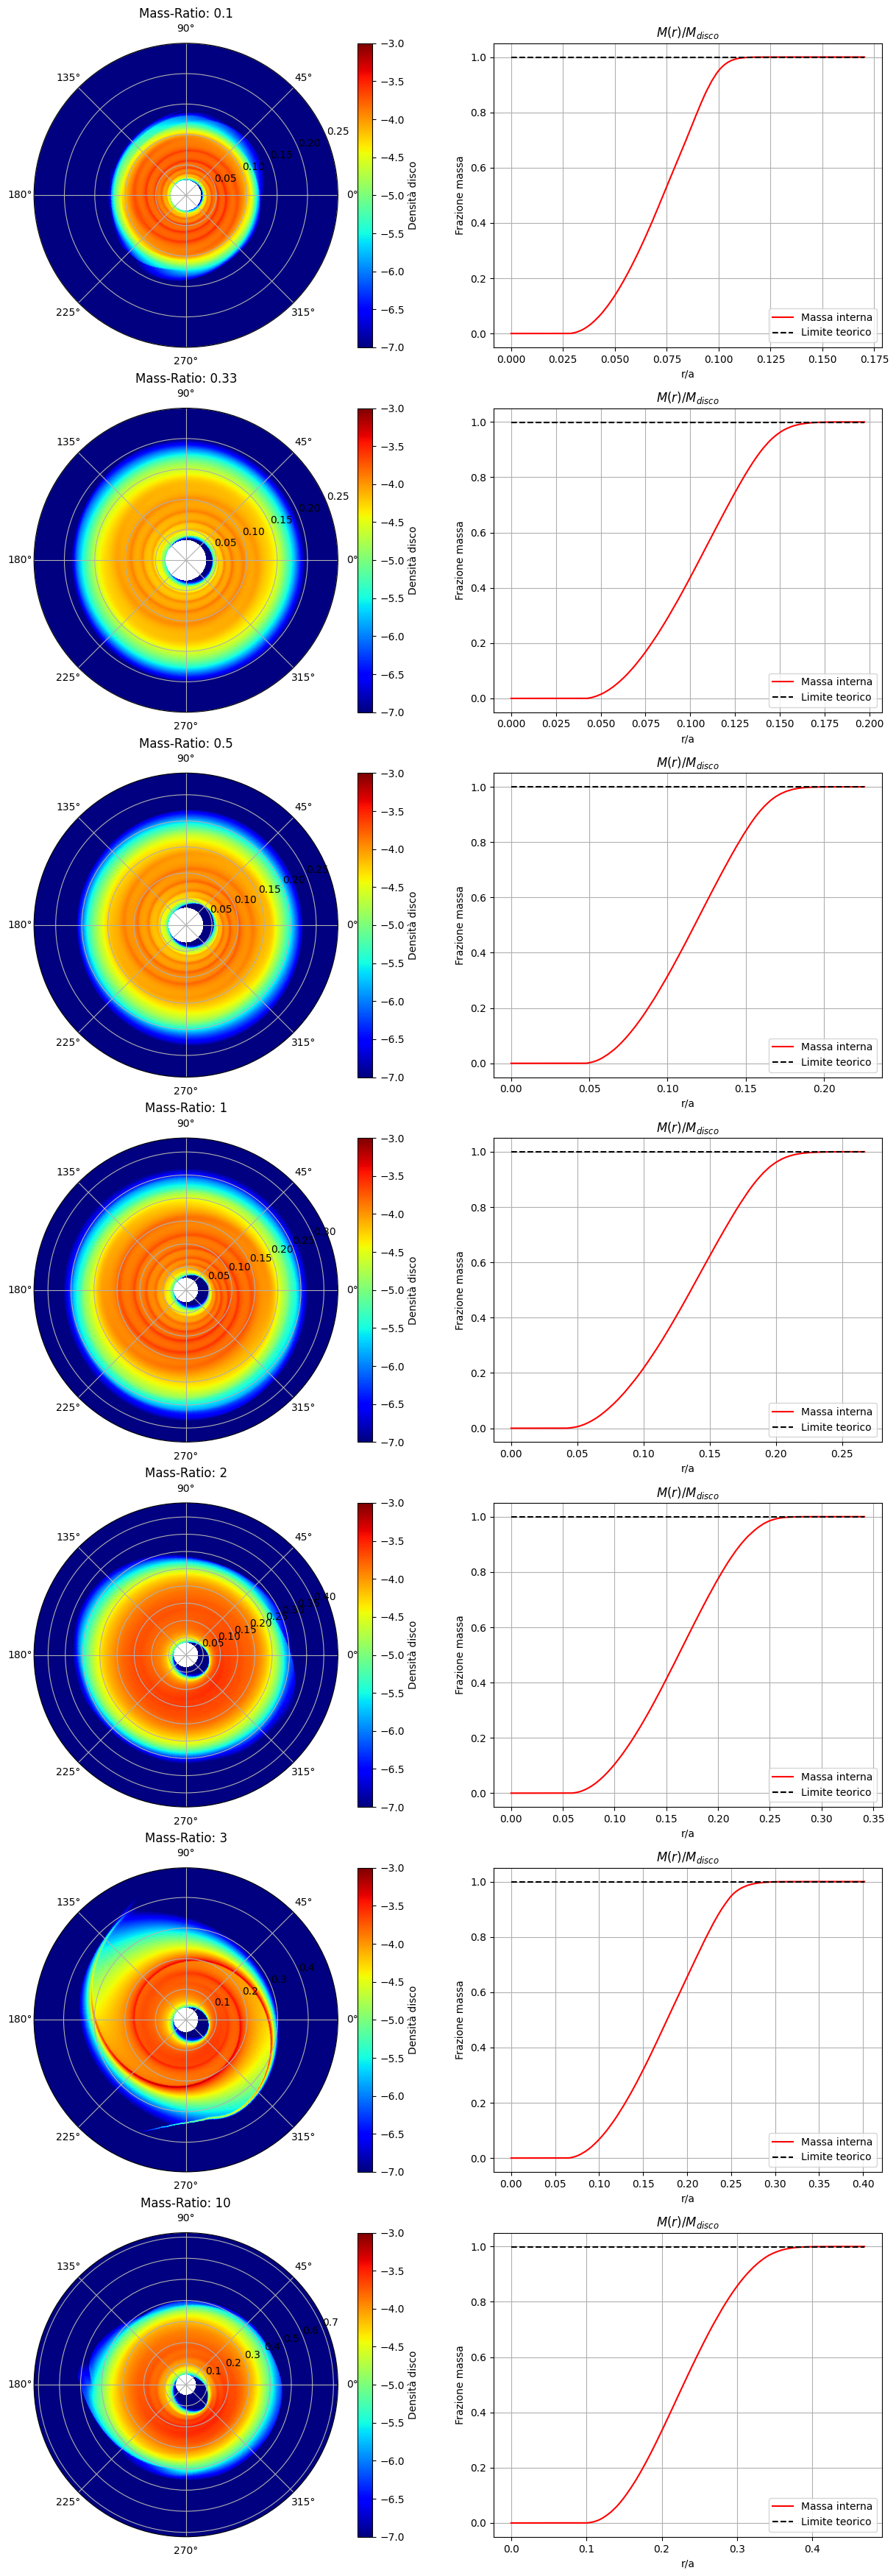

In [5]:
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
lim = -np.array([8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 6.5])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > lim[h]:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > lim[h]:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e3 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-2/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e3[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e3[h], 3)) + " a")


Il raggio di troncamento con mass-ratio 0.1 è: 0.119 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.177 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.198 a
Il raggio di troncamento con mass-ratio 1 è: 0.239 a
Il raggio di troncamento con mass-ratio 2 è: 0.269 a
Il raggio di troncamento con mass-ratio 3 è: 0.304 a
Il raggio di troncamento con mass-ratio 10 è: 0.384 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.6 </span>

<center>

### Output finali

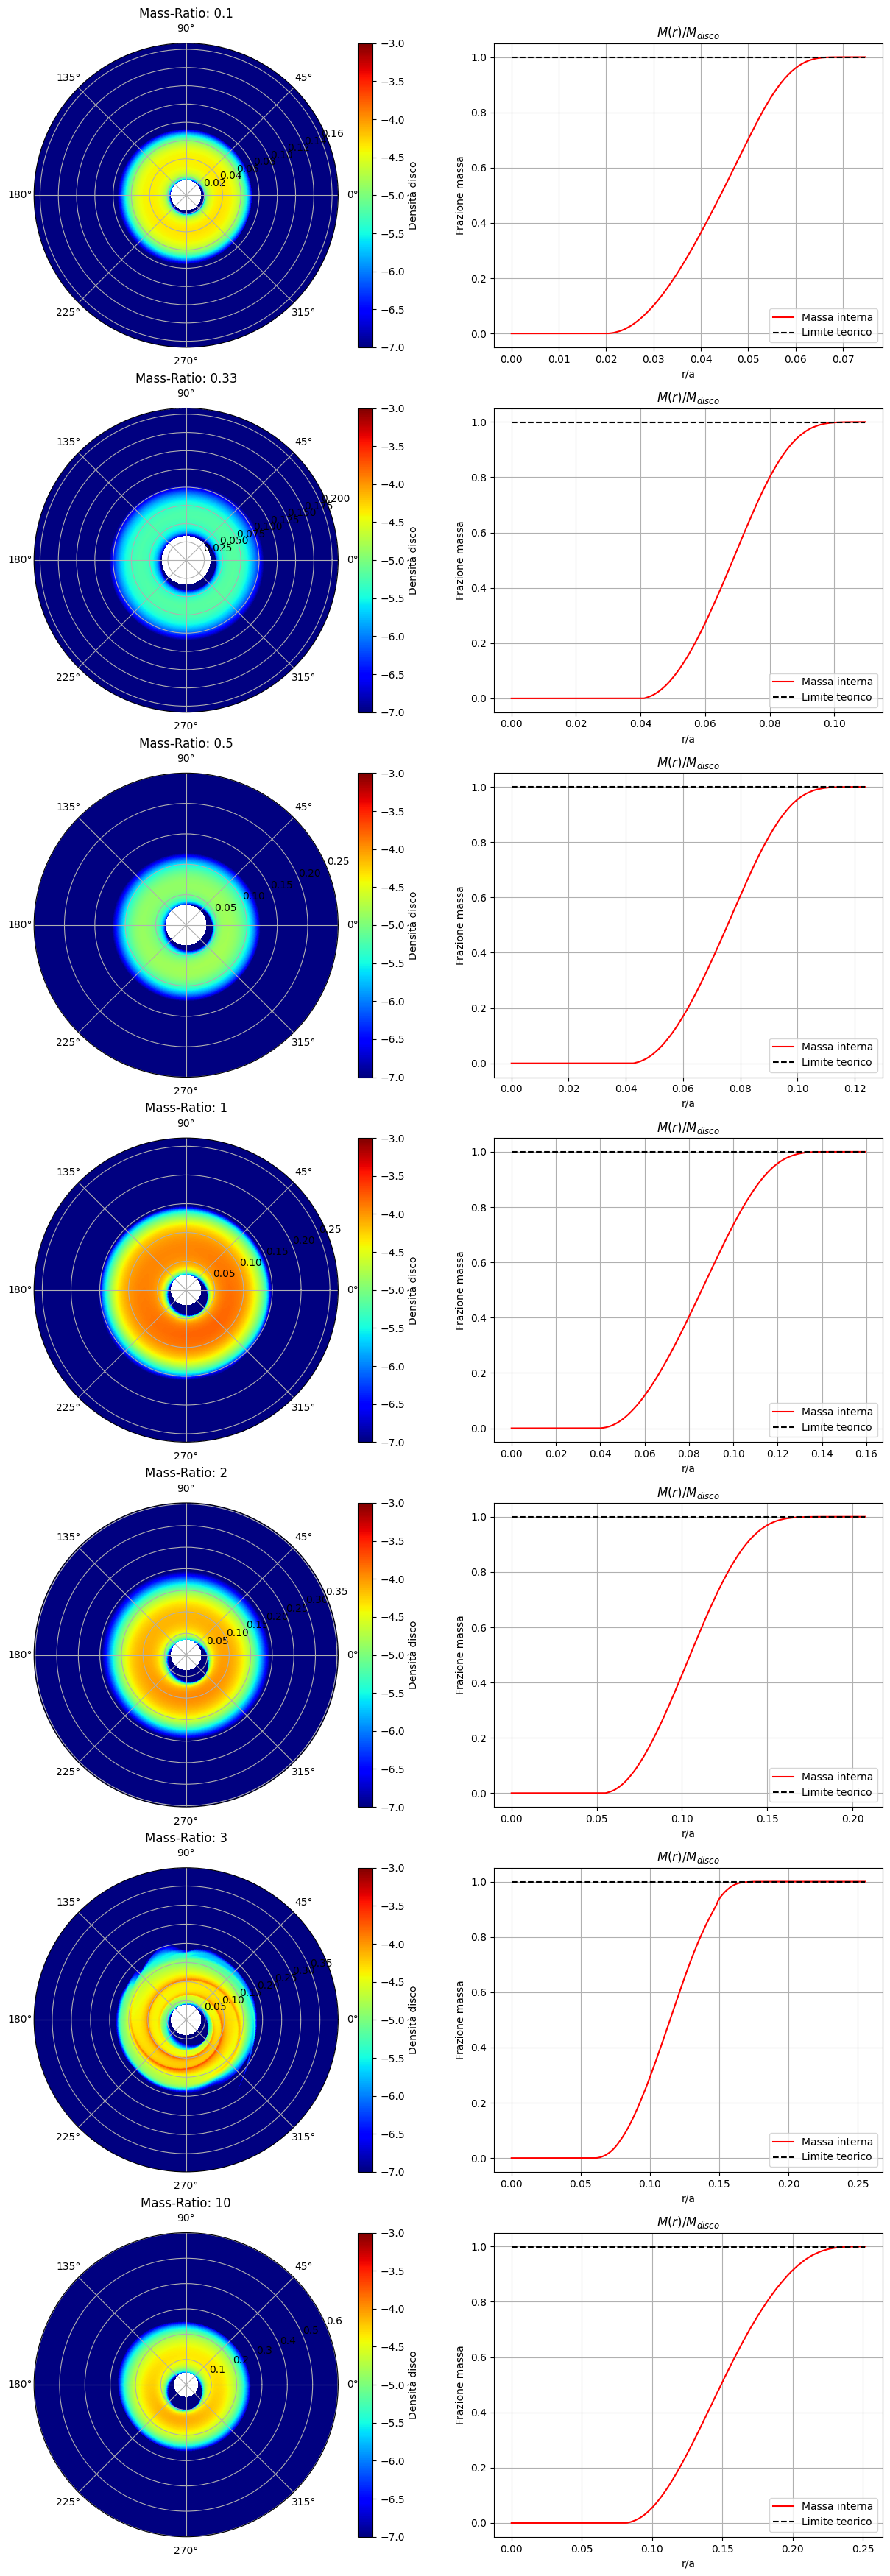

In [7]:
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
lim = -np.array([8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 6.5])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > lim[h]:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > lim[h]:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e6 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-2/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e6[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e6[h], 3)) + " a")


Il raggio di troncamento con mass-ratio 0.1 è: 0.071 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.104 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.121 a
Il raggio di troncamento con mass-ratio 1 è: 0.142 a
Il raggio di troncamento con mass-ratio 2 è: 0.163 a
Il raggio di troncamento con mass-ratio 3 è: 0.184 a
Il raggio di troncamento con mass-ratio 10 è: 0.237 a


<center>

# <span style="color:blue;"> Presentazione dei risultati </span>

<center>

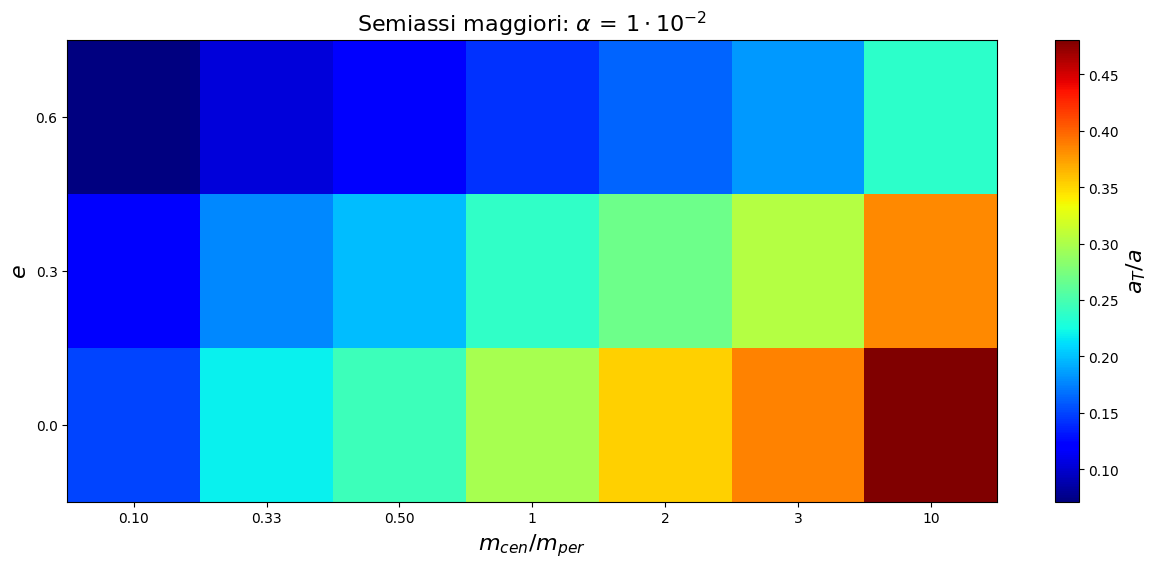

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

r_disco = np.zeros((3, 7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            r_disco[i, j] = sax_A2_e0[j]
        elif i==1:
            r_disco[i, j] = sax_A2_e3[j]
        elif i==2:
            r_disco[i, j] = sax_A2_e6[j]

#r_disco = np.array([[0.150, 0.218, 0.245, 0.298, 0.354, 0.387, 0.481], [0.119, 0.177, 0.198, 0.239, 0.269, 0.304, 0.384], [0.071, 0.104, 0.121, 0.142, 0.163, 0.184, 0.237]])

# Disegnare il grafico polare
cax = ax.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$a_T/a$')
cb.set_label(label=r'$a_T/a$', fontsize = 16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax.set_ylabel(r"$e$", fontsize = 16)
ax.set_title(r"Semiassi maggiori: $\alpha\,=\,1 \cdot 10^{-2}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Confronto con i risultati teorici </span>

<center>

Per determinare il raggio di troncamento teorico lavoro con:
$$ R_t\,=\,R_{Egg}\left(\alpha e^{\beta}\,+\,\gamma \mu^{\delta}\right)$$
dove:
$$ R_{Egg}\,=\,\frac{0.49 q^{2/3}}{0.6 q^{2/3}\,+\,\ln(1\,+\,q^{1/3})} $$

In [10]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = -np.array([0.809, 0.807, 0.802, 0.797, 0.766, 0.757, 0.685])
beta = np.array([0.919, 0.925, 0.918, 0.893, 0.873, 0.845, 0.783])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

### Eccentricità fissata

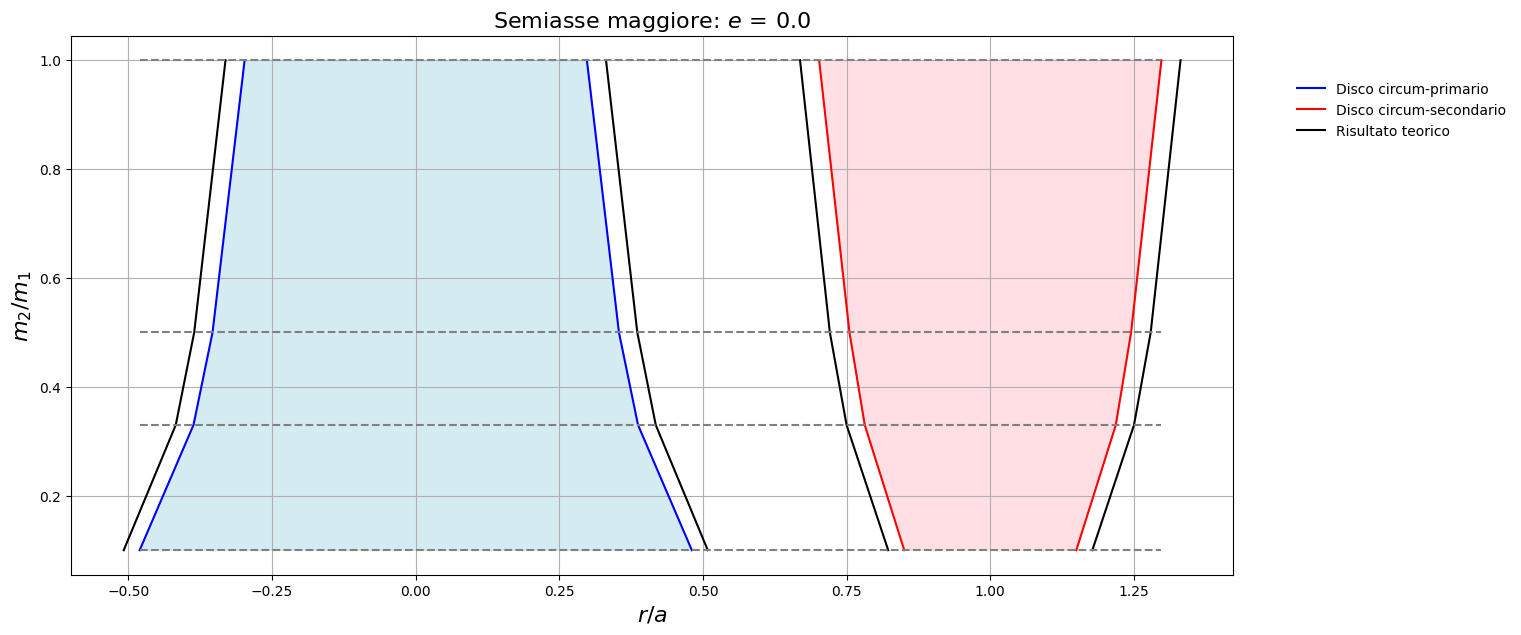

In [14]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A2_e0[6-j]
                x_teo[j] = -sax_tr[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A2_e0[6-j]
                x_teo[j] = sax_tr[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')


    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A2_e0[j]
                x_teo[j] = 1-sax_tr[0, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A2_e0[j]
                x_teo[j] = 1+sax_tr[0, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultato teorico')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A2_e0[6], 1+sax_A2_e0[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A2_e0[6-i]
    else:
        x_fill[i] = sax_A2_e0[i-1]

x_fill[8] = -sax_A2_e0[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A2_e0[i]
    else:
        x_fill[i] = 1+sax_A2_e0[6+1-i]

x_fill[8] = 1-sax_A2_e0[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Semiasse maggiore: $e\,=\,0.0$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

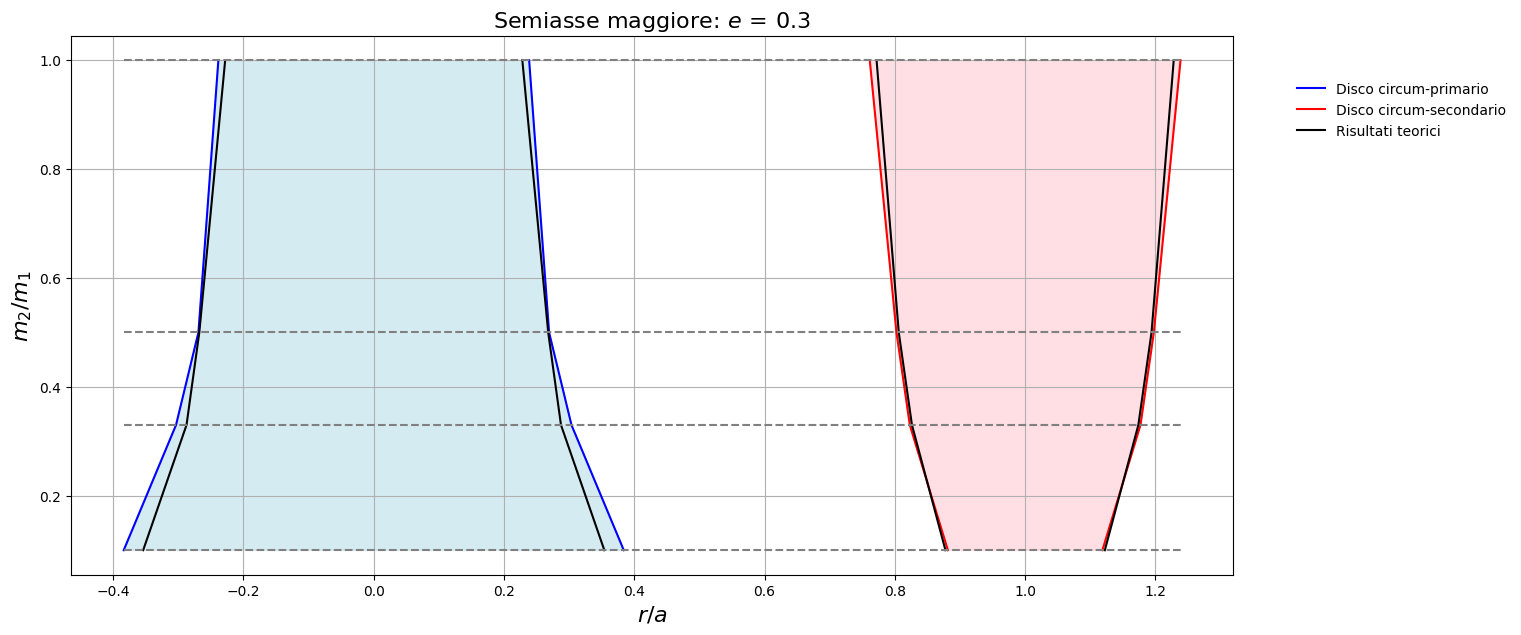

In [15]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A2_e3[6-j]
                x_teo[j] = -sax_tr[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A2_e3[6-j]
                x_teo[j] = sax_tr[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A2_e3[j]
                x_teo[j] = 1-sax_tr[1, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A2_e3[j]
                x_teo[j] = 1+sax_tr[1, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A2_e3[6], 1+sax_A2_e3[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A2_e3[6-i]
    else:
        x_fill[i] = sax_A2_e3[i-1]

x_fill[8] = -sax_A2_e3[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A2_e3[i]
    else:
        x_fill[i] = 1+sax_A2_e3[6+1-i]

x_fill[8] = 1-sax_A2_e3[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Semiasse maggiore: $e\,=\,0.3$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

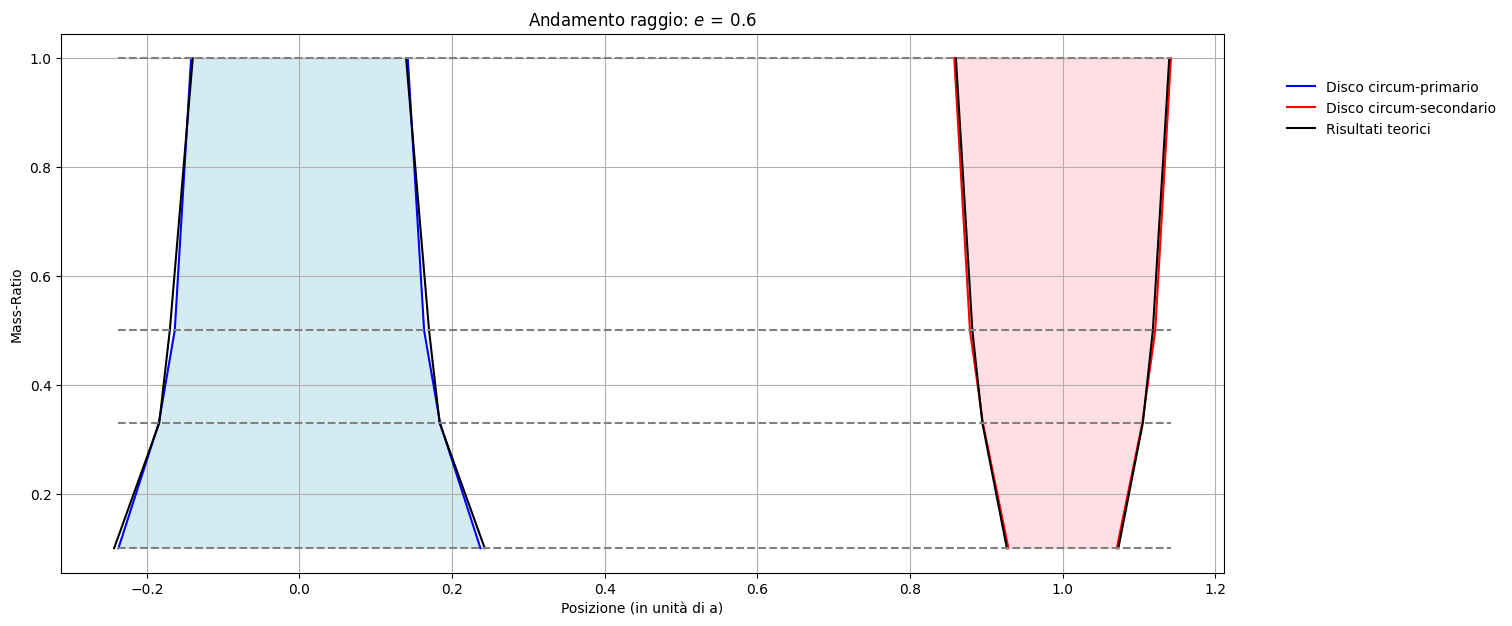

In [13]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A2_e6[6-j]
                x_teo[j] = -sax_tr[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A2_e6[6-j]
                x_teo[j] = sax_tr[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A2_e6[j]
                x_teo[j] = 1-sax_tr[2, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A2_e6[j]
                x_teo[j] = 1+sax_tr[2, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A2_e6[6], 1+sax_A2_e6[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A2_e6[6-i]
    else:
        x_fill[i] = sax_A2_e6[i-1]

x_fill[8] = -sax_A2_e6[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A2_e6[i]
    else:
        x_fill[i] = 1+sax_A2_e6[6+1-i]

x_fill[8] = 1-sax_A2_e6[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Andamento raggio: $e\,=\,0.6$')
plt.ylabel('Mass-Ratio')
plt.xlabel('Posizione (in unità di a)')
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()